In [1]:
import numpy as np
import astrobf
from astrobf.Shin import img_scale
import matplotlib.pyplot as plt 
import math

In [2]:
# Parameters
ddir = "/home/hoseung/Work/tonemap/bf_data/imgs/"
outdir = ddir
blue_fn = ddir+"g.fits"
green_fn = ddir+"r.fits"
red_fn = ddir+"i.fits"
out_fn = outdir+"rgb_bgsub.png"

sig_fract = 3.0
per_fract = 5.0-4
max_iter = 50
min_val = 0.0
non_linear_fact = 0.005
axis_tag = False
#axis_tag = True

def get_a_channel(fn, return_size=True):
    from astropy.io import fits
    hdulist = fits.open(fn)
    img_header = hdulist[0].header
    img_data = np.array(hdulist[0].data, dtype=float)
    width, height = hdulist[0].data.shape
    hdulist.close()
    print("This file = {}, ({}, {})".format(fn, width, height))
    sky, num_iter = img_scale.sky_sig_clip(img_data,
                        sig_fract, per_fract, max_iter, operator='median')
    print("sky = {:.3f} ({:}) for image ({:.3f}, {:.3f})".format(\
                                sky, num_iter, np.max(img_data),np.min(img_data)))
    img_data = img_data - sky
    if return_size:
        return img_scale.asinh(img_data, scale_min = min_val,
                               non_linear=non_linear_fact), (width, height)
    else:
        return img_scale.asinh(img_data, scale_min = min_val,
                               non_linear=non_linear_fact)
    
b, (width, height) = get_a_channel(blue_fn)    
g, (width, height) = get_a_channel(green_fn)    
r, (width, height) = get_a_channel(red_fn)    

This file = /home/hoseung/Work/tonemap/bf_data/imgs/g.fits, (300, 300)
sky = 0.022 (0) for image (33.812, -0.051)
img_scale : asinh
This file = /home/hoseung/Work/tonemap/bf_data/imgs/r.fits, (300, 300)
sky = 0.039 (0) for image (50.688, -0.078)
img_scale : asinh
This file = /home/hoseung/Work/tonemap/bf_data/imgs/i.fits, (300, 300)
sky = 0.058 (0) for image (49.625, -0.159)
img_scale : asinh


Plotting a RGB image of ( 300 , 300 )


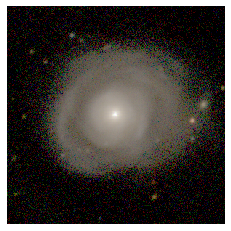

In [13]:
# RGB image with Matplotlib
rgb_array = np.stack((r,g,b),axis=2)
print("Plotting a RGB image of (", width,",",height,")")
plt.imshow(rgb_array, interpolation='nearest', origin='lower')
if axis_tag != True:
    plt.axis('off')
plt.savefig(out_fn)